In [531]:
inputpath = '/Users/nauglrj1/Downloads/sms-20200324100751.xml'
addrlookup= {
    "+1410xxxxxxx" : "Candice",
    "+1410xxxxxxx" : "Pete",
    "+1443xxxxxxx" : "Isabel",
    "+1443xxxxxxx" : "Joel",
    "+1301xxxxxxx" : "Mallory",
    "+1443xxxxxxx" : "Kenny",
    "+1443xxxxxxx" : "Dylan",
    "+1703xxxxxxx" : "Alyssa",
    "+1240xxxxxxx" : "Megan",
    "+1703xxxxxxx" : "Hannah",
    "+1410xxxxxxx" : "Bob"
}

In [540]:
from datetime import datetime
import untangle

groupchat = untangle.parse(inputpath)
print('Number of Messages: ',groupchat.smses['count'])

messages = groupchat.smses.mms
times = [int(mms['date'])/1000 for mms in messages]
print('Start: ',datetime.utcfromtimestamp(min(times)), ' UTC')
print('End: ',datetime.utcfromtimestamp(max(times)), ' UTC')

realtext=dict()
faketext=dict()
image=dict()
video=dict()
other=dict()

for message in messages:
    timestamp = int(message['date'])/1000
    sender = list(filter(lambda x: x['type'] == '137', message.addrs.addr))[0]
    for part in message.parts.part:
        if (part['ct'].startswith('text')):
            text = part['text']
            if (text.startswith(("Liked","Laughed at","Loved","Disliked","Emphasized"))):
                faketext[timestamp] = (sender['address'], text)
            else:
                realtext[timestamp] = (sender['address'], text)
        elif (part['ct'].startswith('image')):
            image[timestamp] = sender['address']
        elif (part['ct'].startswith('video')):
            video[timestamp] = sender['address']
        else:
            other[timestamp] = (sender['address'], part['ct'])

print('  Text: ',len(realtext))
print('  Image: ',len(image))
print('  Reactions: ',len(faketext))
print('  Video: ',len(video))
print('  Other: ',len(other))

Number of Messages:  1720
Start:  2019-12-14 21:57:55  UTC
End:  2020-03-24 13:22:36  UTC
  Text:  1357
  Image:  244
  Reactions:  203
  Video:  8
  Other:  1226


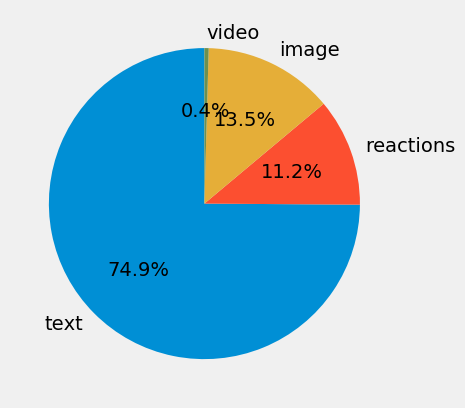

In [542]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'text', 'reactions', 'image', 'video';
sizes = [len(realtext), len(faketext), len(image), len(video)];

fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90);

In [585]:
import numpy as np
import re
from collections import Counter
import pandas as pd
pd.options.display.max_rows
pd.set_option('display.max_rows', 500)

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

textsByPerson = {k: [] for k in addrlookup.keys()}
for sender, text in realtext.values():
    textsByPerson[sender].append(text)
likesByPerson = {k: [] for k in addrlookup.keys()}
for sender, text in faketext.values():
    likesByPerson[sender].append(text)

senders = [addrlookup[key] for key in textsByPerson.keys()]
numTexts = [len(value) for value in textsByPerson.values()]
wordStrings = [" ".join(value) for value in textsByPerson.values()]
# exclude punctuation, emojis, websites and email addresses
wordStringsClean = [re.sub('\S+@\S+', '', f) for f in wordStrings]
wordStringsClean = [re.sub('http\S+', '', f) for f in wordStringsClean]
wordStringsClean = [emoji_pattern.sub(r'', f) for f in wordStringsClean]
wordStringsClean = [re.sub('!|,|\?|\#|\+', ' ', f) for f in wordStringsClean]
wordLists = [re.split(' ',wlist) for wlist in wordStringsClean]
numWords = [len(wlist.split()) for wlist in wordStringsClean]
averages = np.array(numWords) / np.array(numTexts)
counts = [Counter(wlist.split()) for wlist in wordStringsClean]
# boringWords = ['I','is']
# favorites = [item for [item.key() not in boringWords] in counts.items()]
numUnique = [len(count) for count in counts]
eloquence = np.array(numWords) / np.array(numUnique)
longest = [max(re.split(' |/|\.|-|\"',wlist),key=len) for wlist in wordStringsClean]
emojiLists = ["".join(emoji_pattern.findall(f)) for f in wordStrings]
print(emojiLists)
numEmojis = [len(emojiList) for emojiList in emojiLists]
table = {
    'sender': senders,
    'nTexts': numTexts,
    'nWords': words,
    'words/text': averages,
    'nUnique': numUnique,
    '\'eloquence\'': eloquence,
    'longest': longest,
    'nEmoji': numEmojis,
}
table = pd.DataFrame(data=table)
table.round(2).style.hide_index().set_caption("Content Analysis 1")

['😁🥳🧁🎁🎄🎅👼🙏😮🙄🤣😬😆😂', '🤔🍔🌕🍔🌕🥰', '😂👀😬🥥🥛😂🤦🏽🤷🏽😂🎄🎅🏽🤗🥰😂😂🔪🤖👨🏻💻😂😂😉😂🍪👀😝🐍🦜😷🤗😔😂🐕🐕🏈😂🐕🔪👻😂🌱😂😑😆💴🍷🍷🏫🥝🍔😉😂🥝🐑😮🏝😂🥝🇳🇿😂🥜🍨👀🔪🍺🦠😂🧐😀😑😉😂😀😂😀🐀💯😮😝👀😆💪🏽😉👣💯🧐😂🥝🐦😝👀😂😂😂👀🦉👀👀💎👀😔😂😂🤷🏽🤗😉', '🤔', '😂😈😇🤦😊🤮🤷😂😂', '😅🤷🏻👴🏼😅', '👌🍔🌙🐀😁👋🏻😉', '🤦🏻🖤😛🤦🏻🤷🏻😂😂🕺🏻💃🏻😂😂😂😂😂🤔😰🤷🏻😂😂🙃🙃🙃😍😭😂😂😂🧙😉😳😂🙏🤷🏻😉😰😂😂😂😂😂😂😂😂😂🤔🤔🤔😬🤷🏻🤷🏻🤷🏻🤷🏻👍😂🤤😂🤷🏻😫😂😂😂😂😂', '👆🏻😂😂😂😂', '🤘🏻😎😎😎😎😎👩🥰🤘🏻\U0001f9a8💖🦙🎷🐌\U0001f9be🌏🦛🥝🥦🧸🧼🧼🧼🕯🕯😎🤐🏻🏻😬🥰', '🌲😬']


sender,nTexts,nWords,words/text,nUnique,'eloquence',longest,nEmoji
Candice,28,138,4.57,105,1.22,Charlotte's,14
Pete,15,107,6.87,86,1.2,Government,6
Isabel,314,2773,8.46,1170,2.27,chairchallenge,113
Joel,18,129,7.11,102,1.25,consulting,1
Mallory,42,376,8.79,228,1.62,questionable,9
Kenny,73,417,5.63,288,1.43,particularly,6
Dylan,82,720,8.73,439,1.63,Understandable,8
Alyssa,235,2152,9,991,2.13,Hahahahahahaha,75
Megan,94,538,5.67,349,1.53,entertainment,6
Hannah,351,3462,9.82,1507,2.29,immunocompromised,33


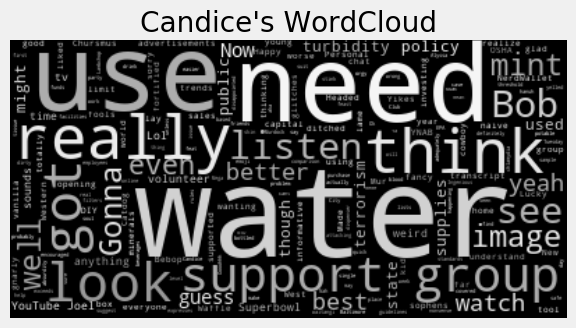

In [597]:
from wordcloud import WordCloud, STOPWORDS
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

stopwords = set(STOPWORDS)
stopwords.add("the")
stopwords.add("and")
stopwords.add("is")
stopwords.add("at")

# wc = WordCloud(stopwords=stopwords).generate_from_frequencies(counts[0]);
wc = WordCloud(stopwords=stopwords).generate(wordStringsClean[10]);
# plt.figure()
plt.title("Candice's WordCloud");
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear");
plt.axis("off");

# wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,
#                random_state=1).generate(text)
# store default colored image
# default_colors = wc.to_array()
# plt.title("Custom colors")
# plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
#            interpolation="bilinear")
# wc.to_file("a_new_hope.png")
# plt.axis("off")
# plt.figure()

In [505]:
likes = {k: [] for k in addrlookup.keys()}
laughs = {k: [] for k in addrlookup.keys()}
loves = {k: [] for k in addrlookup.keys()}
dislikes = {k: [] for k in addrlookup.keys()}
emphasizes = {k: [] for k in addrlookup.keys()}

for sender, text in faketext.values():
    if (text.startswith("Liked")):
        likes[sender].append(text)
    elif (text.startswith("Laughed at")):
        laughs[sender].append(text)
    elif (text.startswith("Loved")):
        loves[sender].append(text)
    elif (text.startswith("Disliked")):
        dislikes[sender].append(text)
    elif (text.startswith("Emphasized")):
        emphasizes[sender].append(text)
        
numReacts = [len(i) for i in likesByPerson.values()]
numLikes = [len(i) for i in likes.values()]
numLaughs = [len(i) for i in laughs.values()]
numLoves = [len(i) for i in loves.values()]
numDislikes = [len(i) for i in dislikes.values()]
numEmphasizes = [len(i) for i in emphasizes.values()]
        
table = {
    'sender': senders,
    'nReacts': numReacts,
    '-1-': numLoves,
    '-2-': numLikes,
    '-3-': numDislikes,
    '-4-': numLaughs,
    '-5-': numEmphasizes,
}
table = pd.DataFrame(data=table)
table.style.set_properties(**{'width':'3em', 'text-align':'center'}).hide_index().set_caption("Content Analysis 2")

sender,nReacts,-1-,-2-,-3-,-4-,-5-
Candice,0,0,0,0,0,0
Peet,3,0,1,0,1,1
Isabel,47,10,11,0,26,0
Joel,5,0,3,0,2,0
Malbert,43,23,4,0,14,2
Kenay,9,2,1,1,5,0
Dylan,10,0,8,0,2,0
Alyssa,81,28,44,0,8,1
Megan,5,1,4,0,0,0
Hanuh,0,0,0,0,0,0


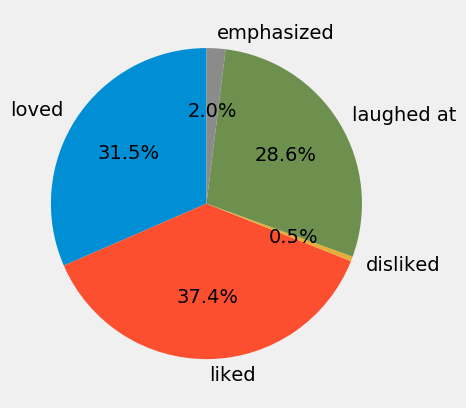

In [478]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'loved', 'liked', 'disliked', 'laughed at', 'emphasized';
sizes = [sum(numLoves), sum(numLikes), sum(numDislikes), sum(numLaughs), sum(numEmphasizes)];

fig1, ax1 = plt.subplots();
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90);

In [514]:
from collections import defaultdict

replies = {p: {s: 0 for s in addrlookup.values() } for p in addrlookup.values()}
for message in messages:
    sender = addrlookup[list(filter(lambda x: x['type'] == '137', message.addrs.addr))[0]['address']]
    if previous:
        replies[previous][sender] += 1
    previous = sender

table = {'sender': sorted(senders)}
    
for previous in sorted(replies.keys()):
    table[previous] = [replies[previous][i] for i in sorted(replies[previous].keys())]
    
table = pd.DataFrame(data=table)
table.style.set_properties(**{'width':'3em', 'text-align':'center'}).hide_index().set_caption("Content Analysis 3")

sender,Alyssa,Bob,Candice,Dylan,Hanuh,Isabel,Joel,Kenay,Malbert,Megan,Peet
Alyssa,80,14,9,18,55,90,7,14,17,27,8
Bob,14,13,2,3,30,26,1,8,0,9,2
Candice,6,0,4,1,5,10,0,3,2,1,1
Dylan,14,7,1,10,23,25,0,11,5,3,1
Hanuh,64,27,2,23,150,43,9,29,13,18,2
Isabel,78,26,6,28,48,121,7,32,23,17,8
Joel,6,5,0,2,4,5,0,0,1,2,0
Kenay,23,6,4,6,25,33,0,7,4,5,0
Malbert,21,6,0,4,12,16,1,2,16,9,1
Megan,27,4,3,3,25,19,0,5,6,24,0


In [513]:
from collections import defaultdict

senderTotal = {s: 0 for s in addrlookup.values()}
replies = {p: {s: 0 for s in addrlookup.values() } for p in addrlookup.values()}
for message in messages:
    sender = addrlookup[list(filter(lambda x: x['type'] == '137', message.addrs.addr))[0]['address']]
    if previous:
        senderTotal[previous] += 1
        replies[previous][sender] += 1
    previous = sender

table = {'sender': sorted(senders)}
    
for previous in sorted(replies.keys()):
    table[previous] = [replies[previous][i] for i in sorted(replies[previous].keys())]
    
table = pd.DataFrame(data=table)
table.style.set_properties(**{'width':'3em', 'text-align':'center'}).hide_index().set_caption("Content Analysis 3")

sender,Alyssa,Bob,Candice,Dylan,Hanuh,Isabel,Joel,Kenay,Malbert,Megan,Peet
Alyssa,23.6,4.1,2.7,5.3,16.2,26.5,2.1,4.1,5,8,2.4
Bob,13,12,1.9,2.8,27.8,24.1,0.9,7.4,0,8.3,1.9
Candice,18.2,0,12.1,3,15.2,30.3,0,9.1,6.1,3,3
Dylan,14,7,1,10,23,25,0,11,5,3,1
Hanuh,16.8,7.1,0.5,6.1,39.5,11.3,2.4,7.6,3.4,4.7,0.5
Isabel,19.8,6.6,1.5,7.1,12.2,30.7,1.8,8.1,5.8,4.3,2
Joel,24,20,0,8,16,20,0,0,4,8,0
Kenay,20.4,5.3,3.5,5.3,22.1,29.2,0,6.2,3.5,4.4,0
Malbert,23.9,6.8,0,4.5,13.6,18.2,1.1,2.3,18.2,10.2,1.1
Megan,23.3,3.4,2.6,2.6,21.6,16.4,0,4.3,5.2,20.7,0


In [525]:
from collections import defaultdict

replies = {p: {s: 0 for s in addrlookup.values() } for p in addrlookup.values()}
for message in messages:
    sender = addrlookup[list(filter(lambda x: x['type'] == '137', message.addrs.addr))[0]['address']]
    if previous and previous != sender:
        replies[previous][sender] += 1
    previous = sender

# table = {'sender': sorted(senders)}
table = dict()
    
for previous in sorted(replies.keys()):
    table[previous] = [replies[previous][i] for i in sorted(replies[previous].keys())]
    
table = pd.DataFrame(data=table)
# normtable=(table-table.mean())/table.std()
normtable = (table-table.min())/(table.max()-table.min())
normtable['sender'] = sorted(senders)
normtable.round(2).style.set_properties(**{'width':'3em', 'text-align':'center'}).hide_index().set_caption("Content Analysis 3")

Alyssa,Bob,Candice,Dylan,Hanuh,Isabel,Joel,Kenay,Malbert,Megan,Peet,sender
0,0.52,1,0.64,1,1,0.78,0.44,0.74,1,1,Alyssa
0.18,0,0.22,0.11,0.55,0.29,0.11,0.25,0,0.33,0.25,Bob
0.08,0,0,0.04,0.09,0.11,0,0.09,0.09,0.04,0.12,Candice
0.18,0.26,0.11,0,0.42,0.28,0,0.34,0.22,0.11,0.12,Dylan
0.82,1,0.22,0.82,0,0.48,1,0.91,0.57,0.67,0.25,Hanuh
1,0.96,0.67,1,0.87,0,0.78,1,1,0.63,1,Isabel
0.08,0.19,0,0.07,0.07,0.06,0,0,0.04,0.07,0,Joel
0.29,0.22,0.44,0.21,0.45,0.37,0,0,0.17,0.19,0,Kenay
0.27,0.22,0,0.14,0.22,0.18,0.11,0.06,0,0.33,0.12,Malbert
0.35,0.15,0.33,0.11,0.45,0.21,0,0.16,0.26,0,0,Megan


In [539]:
mentions = {p: {s: 0 for s in addrlookup.values() } for p in addrlookup.values()}
for sender, text in realtext.values():
    for person in addrlookup.values():
        if person.lower() in text.lower():
            mentions[person][addrlookup[sender]] += 1
#             print(sender,":",person,":",text)
            if person == addrlookup[sender]:
                print(text)

table = {'sender' : sorted(senders)}

for person in sorted(mentions.keys()):
    table[person] = [mentions[person][i] for i in sorted(mentions[person].keys())]

    table = pd.DataFrame(data=table)
table.style.set_properties(**{'width':'3em', 'text-align':'center'}).hide_index().set_caption("Content Analysis 3")

Bob liked an image
Members of the Order of Bobs are generally very private people, much like the organization itself
Alyssa and Joel do quarantine 
xxxxxxxxxxxxxxxx@gmail.com
xxxxxxxxxxxxxxxx@gmail.com
xxxxxxxxxx@gmail.com is marvelling at your artwork
xxxxxxxxxxxxxx@gmail.com
My email is xxxxxxxxxxxxx@gmail.com
xxxxxxxxxxxxx@gmail.com
xxxxxxxxxxxx@gmail.com 


sender,Alyssa,Bob,Candice,Dylan,Hannah,Isabel,Joel,Kenny,Mallory,Megan,Pete
Alyssa,2,2,1,1,0,1,14,2,0,5,1
Bob,1,3,1,1,0,0,2,0,0,1,0
Candice,0,1,1,0,0,0,0,0,1,1,1
Dylan,0,0,0,1,1,1,3,2,0,0,6
Hanuh,5,10,4,7,0,3,5,8,0,1,12
Isabel,5,2,3,3,0,1,12,10,1,3,2
Joel,0,1,0,0,0,0,0,0,0,0,0
Kenay,0,1,0,2,3,2,0,1,0,0,2
Malbert,3,0,0,0,0,0,0,0,0,0,0
Megan,1,0,0,1,0,0,2,0,0,1,0


Days:  100
Days without a text:  34
Isabel 2019-12-18 00:18:12 Murry  chrimmus
Isabel 2019-12-25 01:40:12 https://www.reddit.com/r/rarepuppers/comments/ef5hze/dogs_in_shelter_get_to_pick_their_own_christmas/?utm_source=share&utm_medium=ios_app&utm_name=iossmf
Isabel 2019-12-25 01:41:42 Murry Crimmus ya filthy animals!! ☃️ 🎄 ❄️ 🎅🏽 all the love! 
Alyssa 2019-12-26 01:28:15 Sleep in heavenly peace
Isabel 2020-01-07 00:57:06 https://youtu.be/wfzadSG4NH0
Isabel 2020-01-07 00:58:58 You're welcome 
Pete 2020-01-13 00:55:06 The cat got me. 
Isabel 2020-01-13 02:17:43 Laughed at “The cat got me. ”
Isabel 2020-01-13 02:39:18 https://variety.com/2020/tv/news/westworld-season-3-premiere-evan-rachel-wood-1203464679/
Isabel 2020-01-13 02:39:20 Y'all that is behind, you have 2 months to catch up. These violent delights have such violent ends. 🔪 🤖👨🏻‍💻
Isabel 2020-02-03 00:07:11 https://www.buzzfeed.com/shylawatson/jlo-shakira-superbowl-halftime-jokes
Isabel 2020-02-03 00:07:14 Enjoy. 
Hannah 2020-02-0

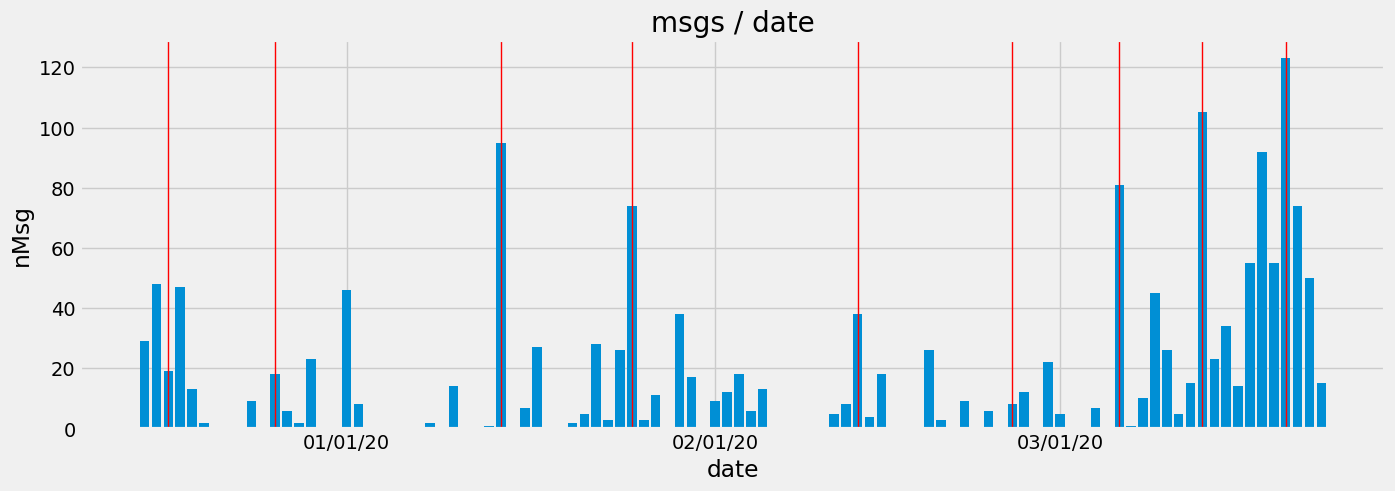

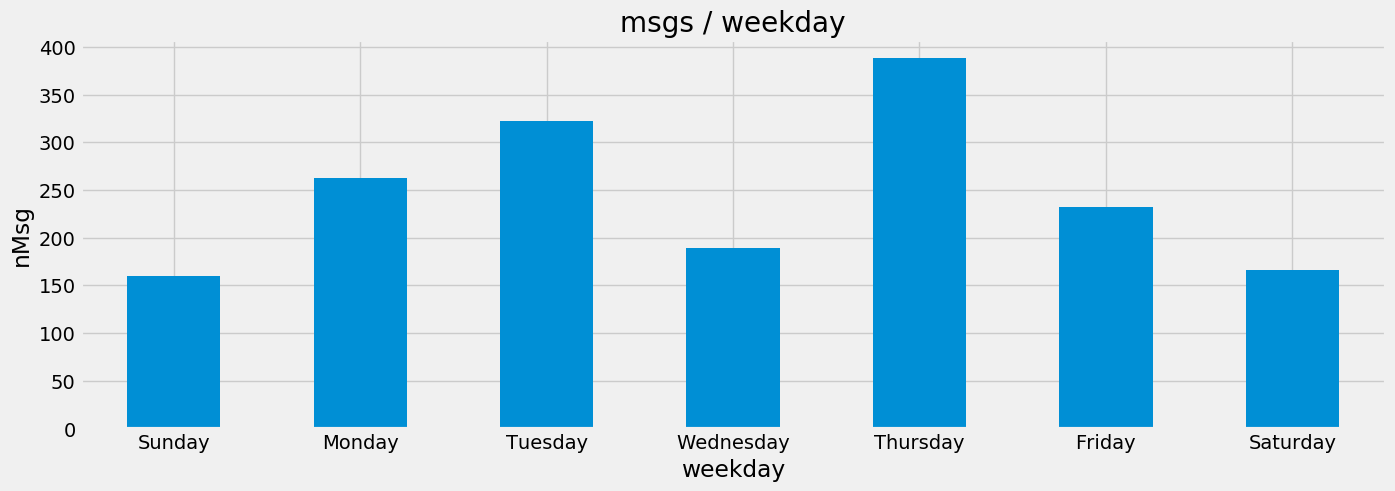

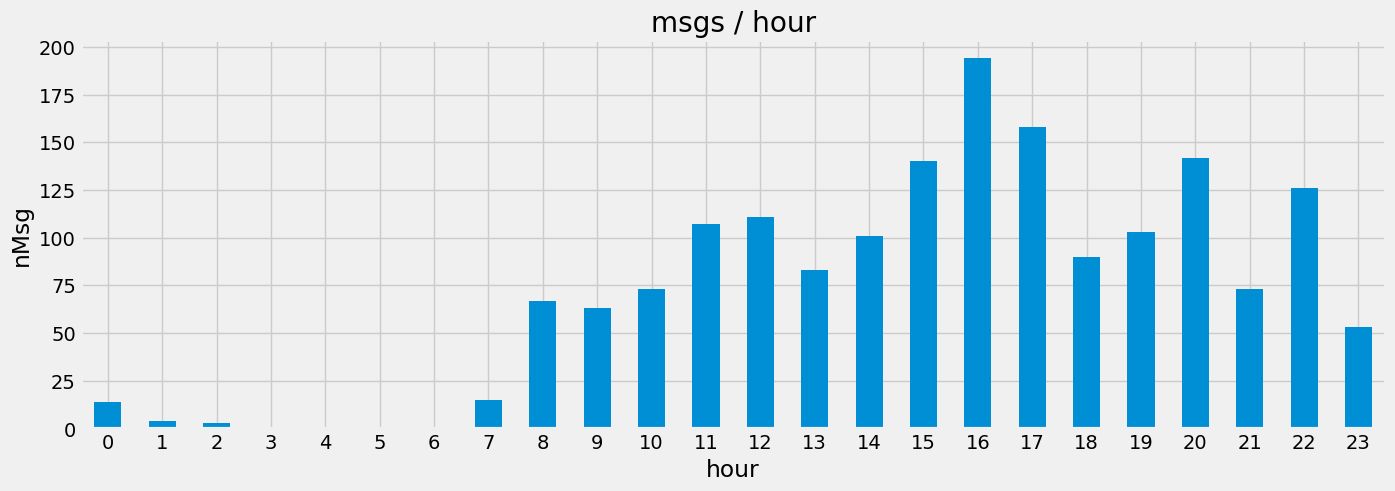

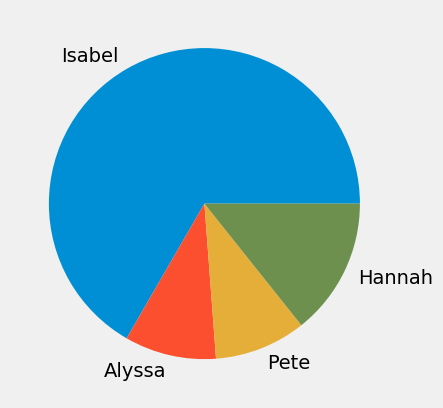

In [557]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
plt.style.use('fivethirtyeight')

estTimes = np.array([time - 14400 for time in times])

fig1, ax1 = plt.subplots(1)
ax1.set_title('msgs / date')
ax1.set_xlabel('date')
ax1.set_ylabel('nMsg')
datetime64Array = np.asarray(estTimes, dtype='datetime64[s]')
startDay = np.datetime64(int(min(estTimes) / 86400) * 86400, 's')
endDay = np.datetime64(int(max(estTimes) / 86400) * 86400, 's')
bins = np.arange(startDay, endDay, 60*60*24)
hist,edges = np.histogram(datetime64Array, bins=bins)
print('Days: ', len(hist))
print('Days without a text: ',sum(x == 0 for x in hist))
ax1.bar(bins[1:], hist)
ax1.xaxis_date()
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))

datesOfInterest=np.array(
    ['2019-12-17', # dylan's bday
     '2019-12-26', # xmas
     '2020-01-14', # hanuh work water situation
     '2020-01-25', # literall nothing out of the ordinary
     '2020-02-13', # knay's bday
     '2020-02-26', # first coronavirus mention (hanuh)
     '2020-03-06', # joel's bday
     '2020-03-13', # governor announcement
     '2020-03-20', # 50% wine
    ])
for xc in datesOfInterest:
    plt.axvline(x=xc, color='red', lw=1)
fig1.set_figwidth(15)

fig2, ax2 = plt.subplots(1)
ax2.set_title('msgs / weekday')
ax2.set_ylabel('nMsg')
dates = [pd.to_datetime(ts, unit='s') for ts in estTimes]
dates = pd.DataFrame({"dates": dates})
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
dates["dates"].groupby(dates["dates"].dt.weekday_name).count().reindex(days).plot(kind="bar",ax=ax2)
ax2.tick_params('x', labelrotation=0)
ax2.set_xlabel('weekday')
fig2.set_figwidth(15)

fig3, ax3 = plt.subplots(1)
ax3.set_title('msgs / hour')
ax3.set_ylabel('nMsg')
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
dates["dates"].groupby(dates["dates"].dt.hour).count().reindex(hours).plot(kind="bar",ax=ax3)
ax3.tick_params('x', labelrotation=0)
ax3.set_xlabel('hour')
fig3.set_figwidth(15)

earlytexters = defaultdict(int)
for message in messages:
    timestamp = int(message['date'])/1000 - 14400
    dt = pd.to_datetime(timestamp, unit='s')
    sender = addrlookup[list(filter(lambda x: x['type'] == '137', message.addrs.addr))[0]['address']]
    if dt.hour < 3:
        earlytexters[sender] += 1
        for part in message.parts.part:
            if (part['ct'].startswith('text')):
                text = part['text']
            elif (part['ct'].startswith('image')):
                text = '<image>'
            elif (part['ct'].startswith('video')):
                text = '<video>'
        
        print (sender,dt,text)

fig4, ax4 = plt.subplots(1);
ax4.pie(earlytexters.values(), labels=earlytexters.keys());
    